# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


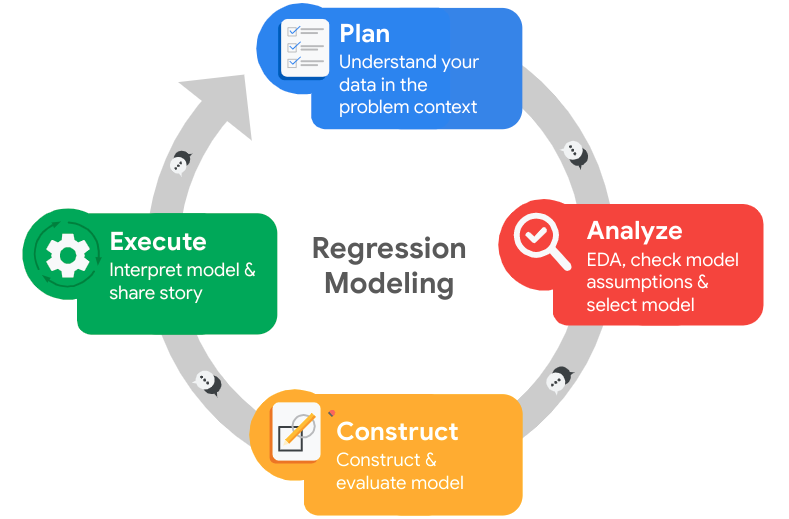

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [79]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [80]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [81]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [82]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [83]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [84]:
# Rename columns as needed
df0 = df0.rename(columns = {'average_montly_hours' : 'average_monthly_hours',
                            'Work_accident' : 'work_accident',
                            'time_spend_company' : 'tenure',
                            'Department' : 'department'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [85]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [86]:
# Check for duplicates
df0.duplicated().sum()


3008

In [87]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [88]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first').reset_index(drop=True)


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

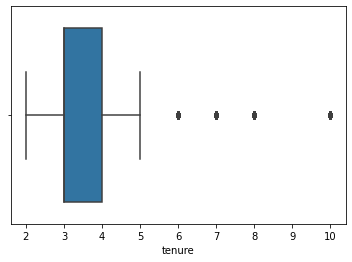

In [89]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x = df1['tenure'])



In [90]:
# Determine the number of rows containing outliers
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('upper limit = ', str(upper_limit))
print('lower_limit = ', str(lower_limit))

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print('number of rows containing outliers = ', len(outliers))

upper limit =  5.5
lower_limit =  1.5
number of rows containing outliers =  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [91]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print('-------------------------')
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True))


0    10000
1     1991
Name: left, dtype: int64
-------------------------
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Number of project X hue = left column')

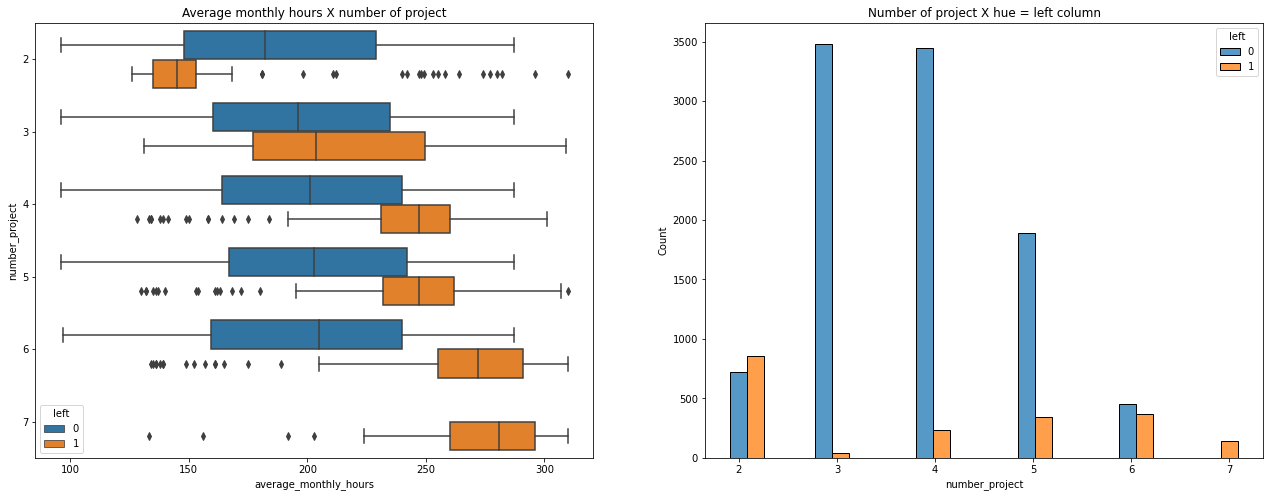

In [92]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left

sns.boxplot(x = df1['average_monthly_hours'], y = df1['number_project'], hue = df1['left'], orient="h", ax = ax[0])
ax[0].set_title('Average monthly hours X number of project')
# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(x = df1['number_project'], hue = df1['left'],shrink = 2, multiple='dodge', ax = ax[1])
ax[1].set_title('Number of project X hue = left column')

there is two types of people those who worked less and finished by getting fired which is logic like when we see at number of project = 2, and the second type is that people who worked ALOT (overwork) which lead into quitting the organisation like we see at number of project = 6 and = 7, average monthly hour for every worker that work 40 hour per week = 166.xx hour (mean), and these people who left worked more than 250 hours which is logic too much work

the best number project for employees seem to be 3 or 4 with less people who left

In [93]:
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

We can see that everyone who had more than 250 hours of work left when it comes to number of project = 7

Text(0.5, 1.0, 'Average monthly hours X satisfaction level')

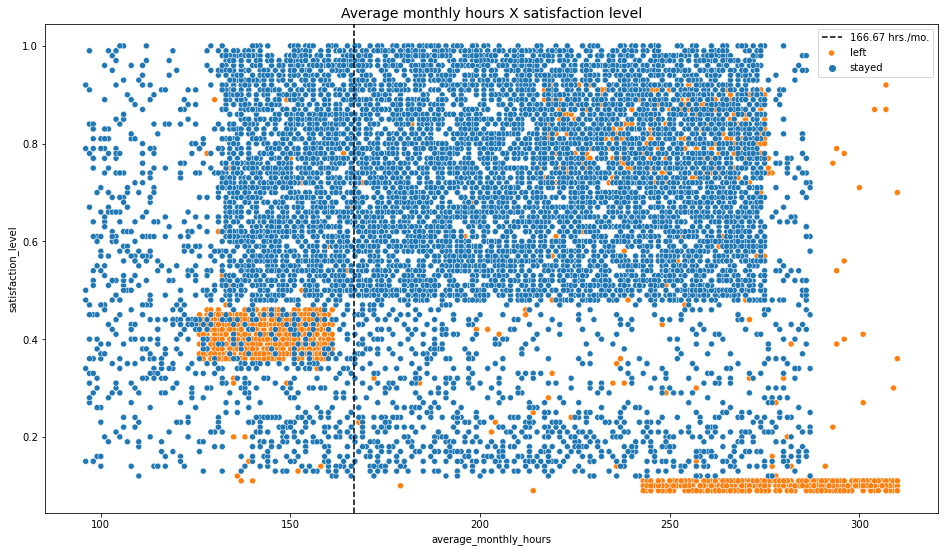

In [94]:
# Create a plot as needed
plt.figure(figsize = (16, 9))
sns.scatterplot(x = df1['average_monthly_hours'], y = df1['satisfaction_level'], hue = df1['left'])
plt.axvline(x=166.67, color='#000000', label='166.67 hrs/mo', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Average monthly hours X satisfaction level', fontsize = '14')


Text(0.5, 1.0, 'Tenure X hue = left column')

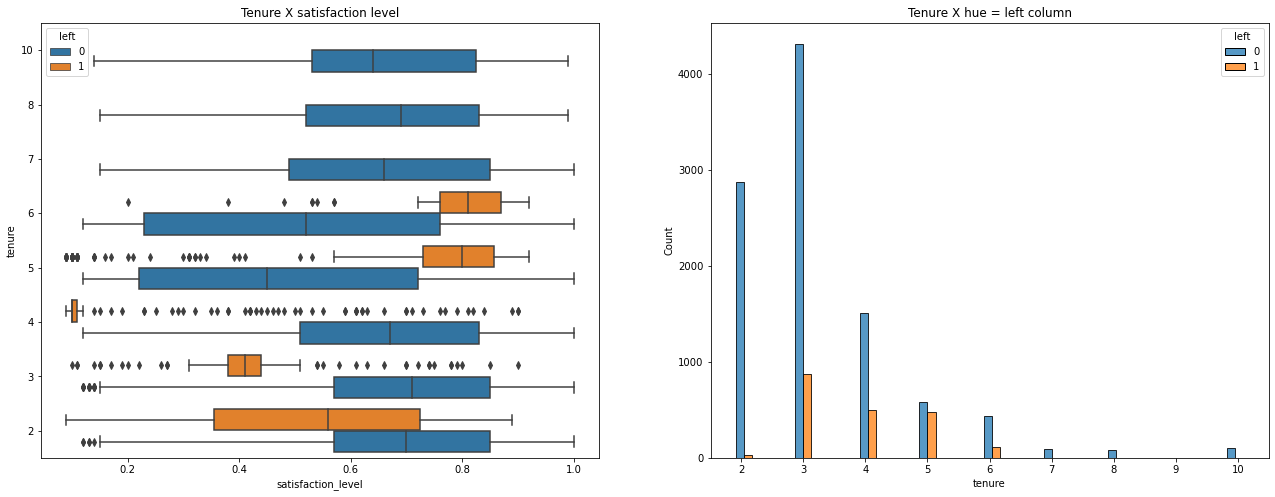

In [95]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left

sns.boxplot(x = df1['satisfaction_level'], y = df1['tenure'], hue = df1['left'], orient="h", ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Tenure X satisfaction level')
# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(x = df1['tenure'], hue = df1['left'],shrink = 3, multiple='dodge', ax = ax[1])
ax[1].set_title('Tenure X hue = left column')


there is some people who left after 2 years in the organisation with a medium satisfaction level, people who left after 3 years with a low satisfaction level, also very low satisfaction level of people who left at 4 years we should review maybe the policy of people who have 4 years in the organisation, and there is people who left after 5-6 years with a good satisfaction level

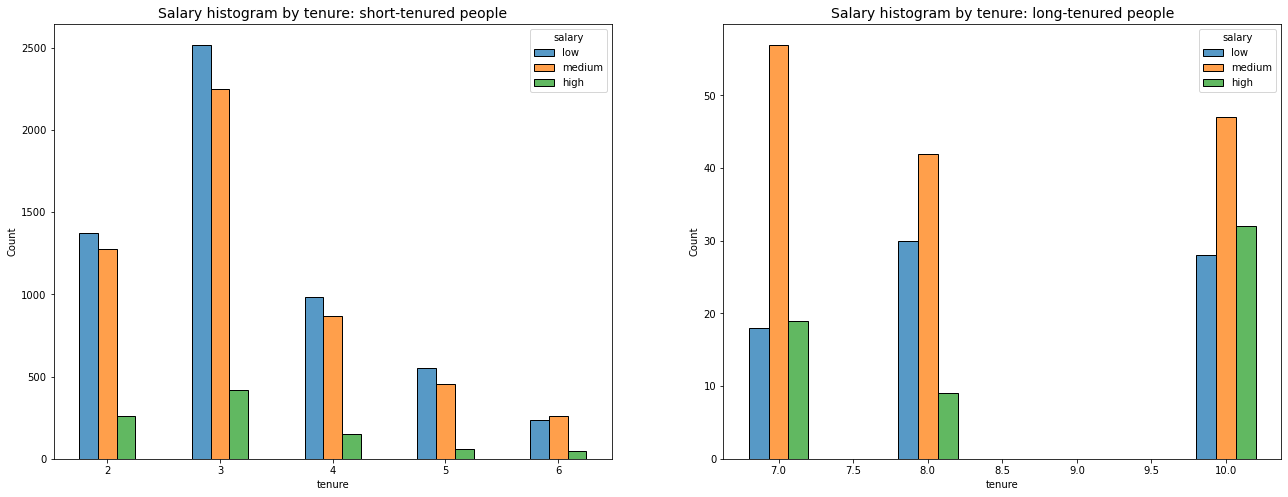

In [96]:
# Create a plot as needed
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');


Text(0.5, 1.0, 'Average monthly hours X last evaluation')

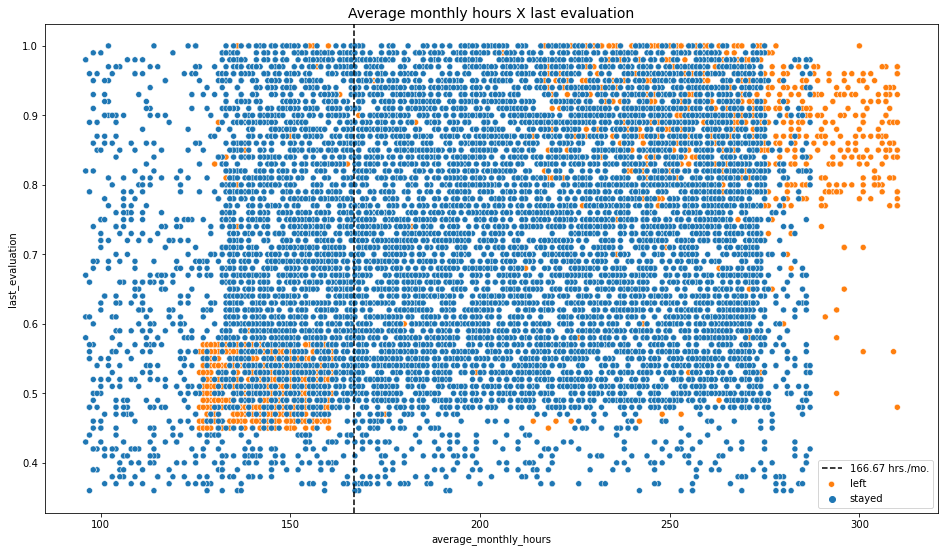

In [97]:
# Create a plot as needed
plt.figure(figsize = (16, 9))
sns.scatterplot(x = df1['average_monthly_hours'], y = df1['last_evaluation'], hue = df1['left'])
plt.axvline(x=166.67, color='#000000', label='166.67 hrs/mo', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Average monthly hours X last evaluation', fontsize = '14')


more monthly hours doesn't mean better evaluations, also there is two types of people who left, some who had lower than 166.67 hours per month with low evaluations and overworkers with good evaluations

Text(0.5, 1.0, 'Average monthly hours X promotion last 5 years ')

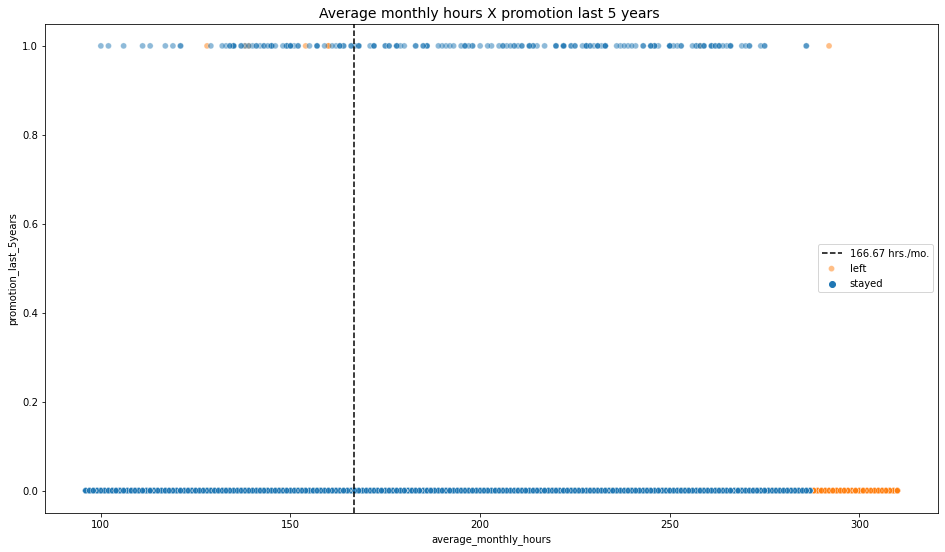

In [98]:
# Create a plot as needed
plt.figure(figsize = (16, 9))
sns.scatterplot(x = df1['average_monthly_hours'], y = df1['promotion_last_5years'], hue = df1['left'], alpha = 0.5)
plt.axvline(x=166.67, color='#000000', label='166.67 hrs/mo', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Average monthly hours X promotion last 5 years ', fontsize = '14')


first of all few people got promoted, very few people who got promoted left, also the problem is alot of the overworkers who didn't get promoted left

Text(0.5, 1.0, 'People who left/stayed per departement')

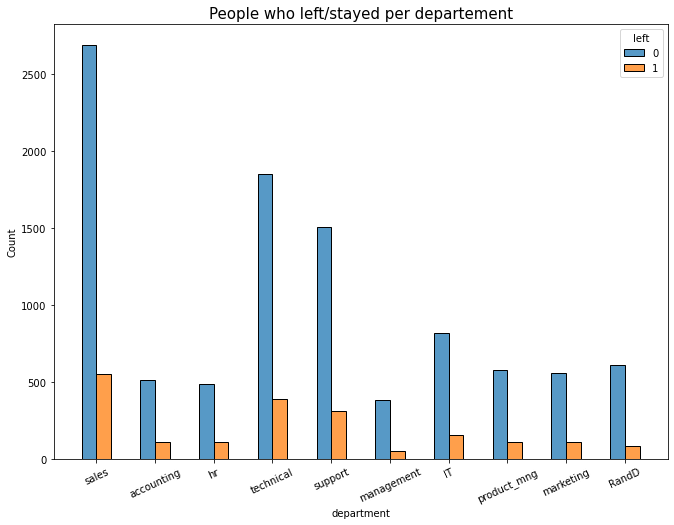

In [99]:
# Create a plot as needed
plt.figure(figsize = (11, 8))
sns.histplot(x = df1['department'], hue = df1['left'], shrink = .5, hue_order = [0, 1], multiple='dodge')
plt.xticks(rotation = '25')
plt.title('People who left/stayed per departement', fontsize = 15)

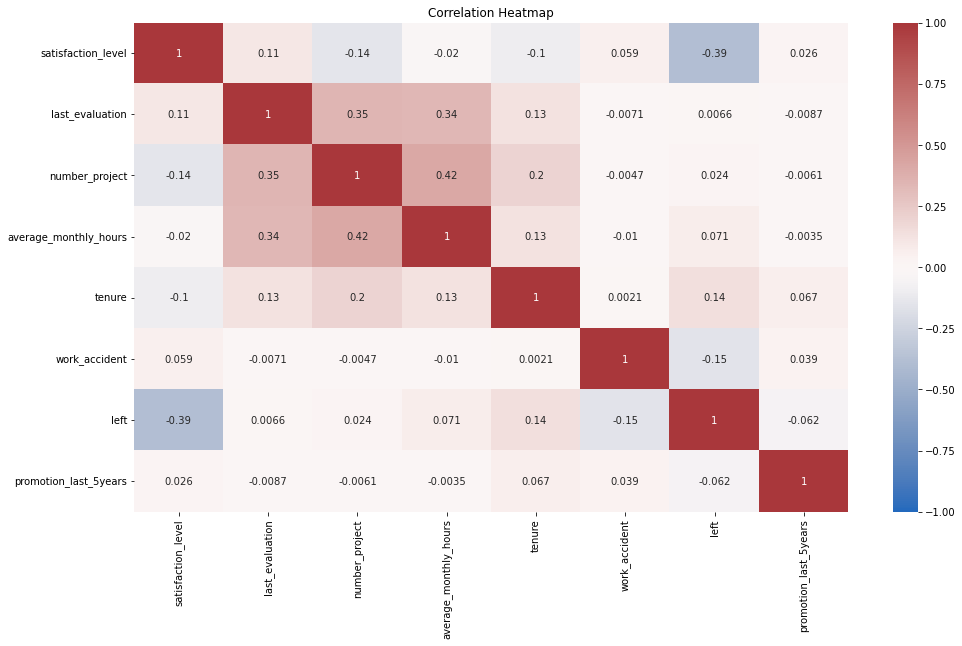

In [100]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap');


there is a correlation between "last_evaluation", "number_project", "average_monthly_hours" and the leaving factor is negatively correlated with "satisfaction_level"

### Insights

we can see that employees are leaving because of poor management of the organisation, so many projects also overworking more than 166h a month which lead into a low satisfaction and leaving after.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

categorical prediction task, we will use "left" column as Y or label to predict

### Identify the types of models most appropriate for this task.

categorical prediction so we have the choice between logistic regression and tree based model

### Modeling

Add as many cells as you need to conduct the modeling process.

**Logistic Regression :** 

In [101]:
df_enc = df1.copy()

df_enc['salary'] = df_enc['salary'].astype('category').cat.codes
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [102]:
df_enc= pd.get_dummies(df_enc, columns=['department'])
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Heatmap of predictive variables')

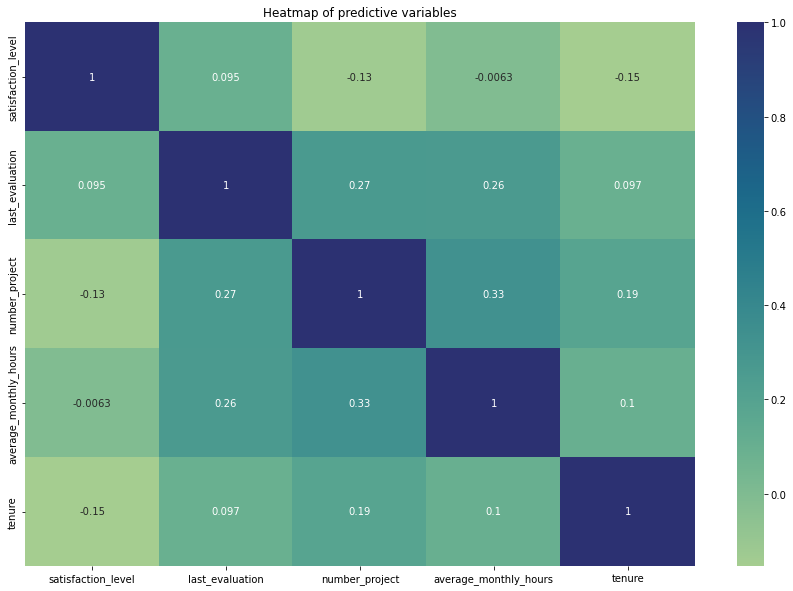

In [103]:
plt.figure(figsize = (15,10))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of predictive variables')

We can see the best correlation is 0.33 which is low

In [104]:
# We need to delete outliers that we saw earlier with the column "tenure" because logistic regression is sensitive to outliers
df_enc_without_outliers = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)].reset_index(drop = True)

df_enc_without_outliers.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [105]:
y = df_enc_without_outliers['left']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [106]:
X = df_enc_without_outliers.drop(columns = 'left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [108]:
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [109]:
clf.coef_

array([[-4.32485024e+00, -4.26553752e-03, -4.80951828e-01,
         3.58241222e-03,  1.08645998e+00, -1.45932835e+00,
        -9.13210252e-01, -3.77263729e-02, -1.39353152e-01,
        -3.06081000e-01, -2.62322318e-01,  3.66041436e-02,
        -3.46424827e-01, -1.45525184e-01, -1.81701005e-01,
         1.24660206e-02, -7.98180511e-04,  2.55170846e-02]])

In [110]:
clf.intercept_

array([-1.49830068])

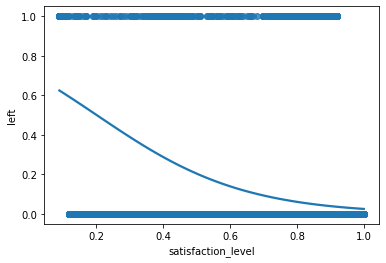

In [111]:
sns.regplot(x="satisfaction_level", y="left", data=df_enc_without_outliers, logistic=True, ci=None)

In [112]:
y_pred = clf.predict(X_test)

In [113]:
print(y_pred)

[0 0 0 ... 1 0 1]


In [114]:
clf.predict_proba(X_test)

array([[0.70231143, 0.29768857],
       [0.77909946, 0.22090054],
       [0.63771632, 0.36228368],
       ...,
       [0.48715368, 0.51284632],
       [0.77936416, 0.22063584],
       [0.41337795, 0.58662205]])

In [115]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.822143
Precision: 0.450794
Recall: 0.251327
F1 Score: 0.322727


In [116]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2786
    Predicted would leave       0.45      0.25      0.32       565

                 accuracy                           0.82      3351
                macro avg       0.66      0.59      0.61      3351
             weighted avg       0.79      0.82      0.80      3351



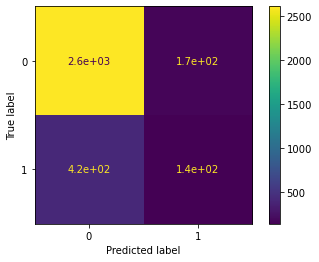

In [117]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

**Tree based models :**

In [118]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [119]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.971352
Precision: 0.913580
Recall: 0.916814
F1 Score: 0.915194


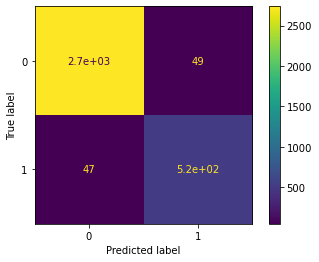

In [120]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

In [121]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, dt_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2786
    Predicted would leave       0.91      0.92      0.92       565

                 accuracy                           0.97      3351
                macro avg       0.95      0.95      0.95      3351
             weighted avg       0.97      0.97      0.97      3351



We can see that the decision tree model outplayed the logistic regression model and gave better results, in the confusion matrix there is 49 false positives and 47 false negatives in the decision tree model and 420 false negatives and 170 false positives in the regression model's matrix

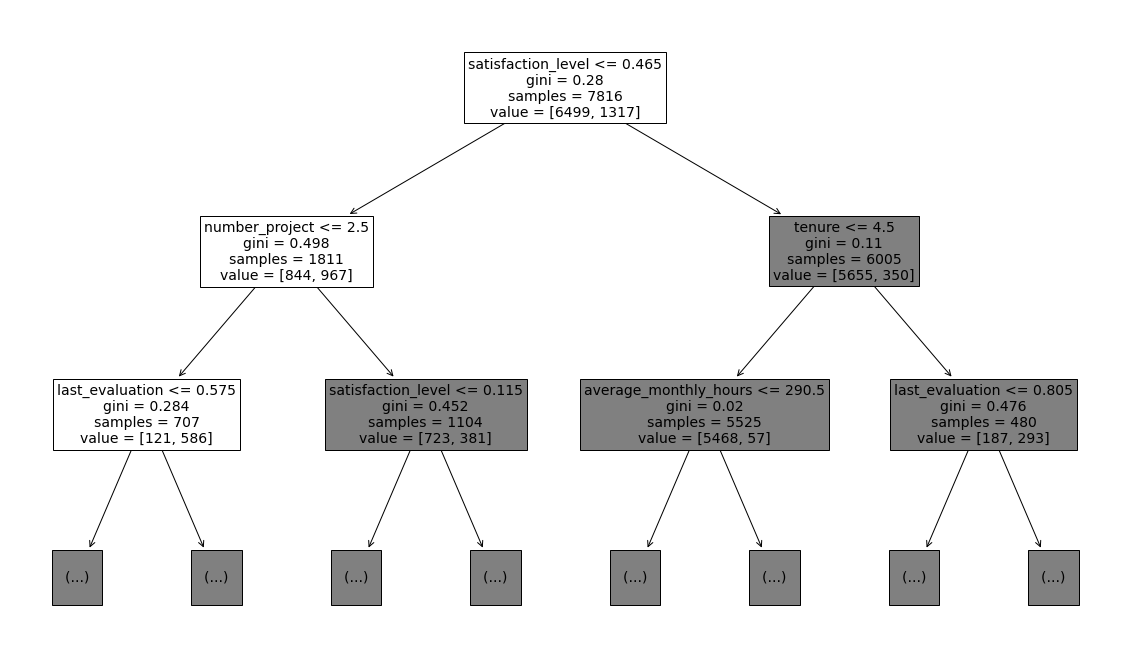

In [122]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);

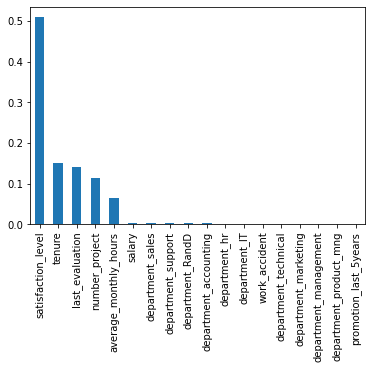

In [123]:
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

**Random Forest :**

In [128]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'f1')

In [129]:
%%time

rf_cv.fit(X_train, y_train)

CPU times: user 10min 45s, sys: 0 ns, total: 10min 45s
Wall time: 10min 45s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [130]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [131]:
rf_opt = RandomForestClassifier(max_depth = None,
  max_features = 1.0,
 max_samples = 0.7,
 min_samples_leaf = 1,
 min_samples_split = 3,
 n_estimators = 500,
  random_state = 0)

In [132]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [133]:
rf_pred = rf_opt.predict(X_test)

In [135]:
print("Random Forest Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, rf_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, rf_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, rf_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, rf_pred))

print('-----------------------------------')

print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Random Forest Tree
Accuracy: 0.984781
Precision: 0.994231
Recall: 0.915044
F1 Score: 0.952995
-----------------------------------
Decision Tree
Accuracy: 0.971352
Precision: 0.913580
Recall: 0.916814
F1 Score: 0.915194


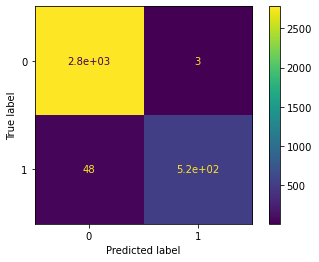

In [136]:
cm = metrics.confusion_matrix(y_test, rf_pred, labels = rf_opt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_opt.classes_)
disp.plot()

We can see that random forest with GridSearchCV outperformed the decision tree performances, false negatives are pretty much the same but false positives are nearly inexistant and equal to 3

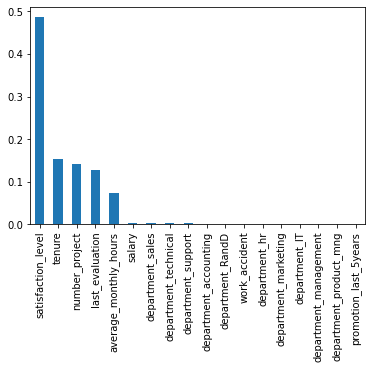

In [140]:
importances = rf_opt.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

Same important features as the decision tree's features

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression Model :**

- Accuracy: 0.822143
- Precision: 0.450794
- Recall: 0.251327
- F1 Score: 0.322727
 
 **Decision Tree Model :**
 
- Accuracy: 0.971352
- Precision: 0.913580
- Recall: 0.916814
- F1 Score: 0.915194

**Random Forest Tree Model :**

- Accuracy: 0.984781
- Precision: 0.994231
- Recall: 0.915044
- F1 Score: 0.952995

We can see that **Random Forest Model** is better than others models

### Conclusion, Recommendations, Next Steps

**To keep employees we can :** 

- Set a limit to the number of project that can a employee work in.
- Reduce the work time to 166h a month to get more satisfaction from employees because nobody likes overworking or reward the  employees that works more than that
- Give promotion to employees that didn't have any in the last 5 years
